# SIMPLE LINEAR REGRESSION  _(WEIGHT vs. HEIGHT)_
---

```julia
versioninfo() # -> v"1.11.1"
```

In [1]:
cd(@__DIR__)

In [2]:
using Pkg; pkg"activate .."

  Activating project at `~/Work/git-repos/AI-ML-DL/jlai/Codes/Julia/Part-2`


Import librairies

In [3]:
using CSV, DataFrames
using MLJ

Load the dataset

In [4]:
df = CSV.read("../../Datasets/Weight_Height.csv", DataFrame)

10000×3 DataFrame
   Row │ Gender   Height   Weight   
       │ String7  Float64  Float64  
───────┼────────────────────────────
     1 │ Male     73.847   241.894
     2 │ Male     68.7819  162.31
     3 │ Male     74.1101  212.741
     4 │ Male     71.731   220.042
     5 │ Male     69.8818  206.35
     6 │ Male     67.253   152.212
     7 │ Male     68.7851  183.928
     8 │ Male     68.3485  167.971
     9 │ Male     67.0189  175.929
    10 │ Male     63.4565  156.4
    11 │ Male     71.1954  186.605
   ⋮   │    ⋮        ⋮        ⋮
  9991 │ Female   63.1795  141.266
  9992 │ Female   62.6367  102.854
  9993 │ Female   62.0778  138.692
  9994 │ Female   60.0304   97.6874
  9995 │ Female   59.0983  110.53
  9996 │ Female   66.1727  136.777
  9997 │ Female   67.0672  170.868
  9998 │ Female   63.868   128.475
  9999 │ Female   69.0342  163.852
 10000 │ Female   61.9442  113.649
                   9979 rows omitted

Unpacking features & target

In [5]:
x = df.Height
first(x, 5)

5-element Vector{Float64}:
 73.847017017515
 68.7819040458903
 74.1101053917849
 71.7309784033377
 69.8817958611153

In [6]:
y = df.Weight
first(y, 5)

5-element Vector{Float64}:
 241.893563180437
 162.3104725213
 212.7408555565
 220.042470303077
 206.349800623871

Scatter Plot of `Weight` vs. `Height`

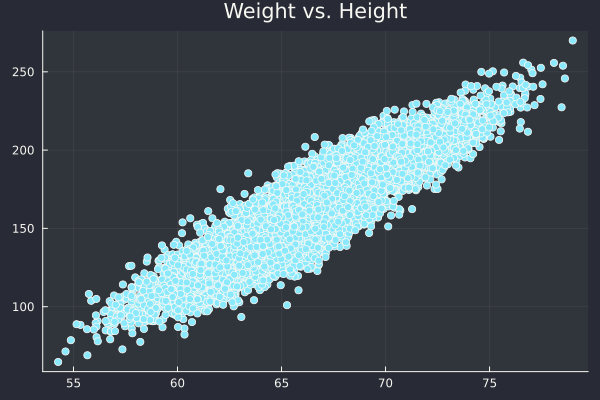

In [7]:
using Plots
scatter(x, y, label=:none, title="Weight vs. Height")

Split the data

In [8]:
train, test = partition(eachindex(y), 0.8, shuffle=true, rng=123)
xtrain, xtest = x[train], x[test]
ytrain, ytest = y[train], y[test]

([212.867963025049, 185.77874641179, 110.800198280178, 112.90994781459, 208.609783230505, 222.397560523835, 193.217672687431, 170.514212621921, 127.070393942324, 161.881840823847  …  202.357719518503, 143.541242212163, 192.181668737126, 110.77608877391, 168.168504168262, 103.026622174333, 114.791401025589, 214.203286663676, 164.295241252612, 92.035945841726], [204.47592322294, 133.332513404247, 189.780275471416, 217.99483956992, 181.941318051727, 217.393962524059, 135.734081112462, 200.575743461554, 114.718563573216, 157.834902333155  …  139.340537312666, 199.272274753083, 145.429650465367, 105.682555962401, 137.43164487291, 184.158554267461, 198.636737557155, 145.852290843349, 93.2041025189544, 204.416126921461])

Load & instantiate the linear regression Object

In [9]:
LR = @load LinearRegressor pkg=MLJLinearModels
lr_ = LR()

[ Info: For silent loading, specify `verbosity=0`. 


import MLJLinearModels ✔


LinearRegressor(
  fit_intercept = true, 
  solver = nothing)

Train & fit

In [10]:
lr = machine(lr_, Tables.table(xtrain), ytrain) |> fit!

[ Info: Training machine(LinearRegressor(fit_intercept = true, …), …).
┌ Info: Solver: MLJLinearModels.Analytical
│   iterative: Bool false
└   max_inner: Int64 200


trained Machine; caches model-specific representations of data
  model: LinearRegressor(fit_intercept = true, …)
  args: 
    1:	Source @508 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @588 ⏎ AbstractVector{Continuous}


Fitted parameters

In [11]:
fitted_params(lr)

(coefs = [:Column1 => 7.7050950402340295],
 intercept = -349.993766084995,)

Prediction

In [12]:
yhat = predict(lr, Tables.table(xtest))
first(yhat, 5)

5-element Vector{Float64}:
 198.42847974975103
 151.6680747697705
 179.68256839326347
 188.416295475254
 181.6458251151359

Metric

In [13]:
println("Error is $(sum( (yhat .- ytest).^2 ) ./ length(ytest) )")

Error is 149.05496963885025


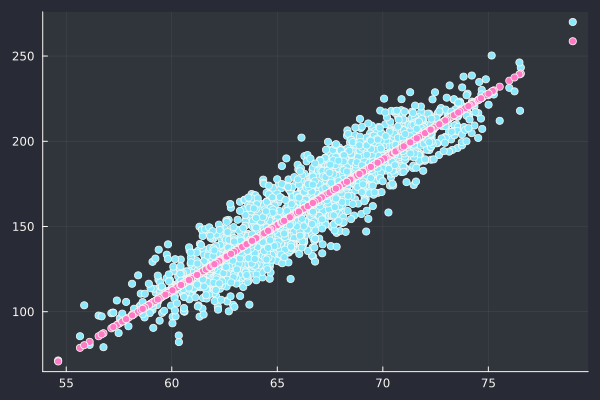

In [14]:
scatter(xtest, ytest, label=:none)
scatter!(xtest, yhat, label=:none)